# Assignment
In this assignment, you continue working with the fashion MNIST dataset. Use the same sample of size 10000 with the previous checkpoint for the sake of comparability. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Load the dataset and make your preprocessing like normalizing the data.
2. Apply t-SNE to the data by setting n_components=2.
3. Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.
4. Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?
5. Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# #1
Load the dataset and make your preprocessing like normalizing the data.

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
indices = np.random.choice(70000,1000)
X = mnist.data[indices]
y = mnist.target[indices]
X_std = StandardScaler().fit_transform(X)

# #2
Apply t-SNE to the data by setting n_components=2.

In [4]:
%%time
X_tsne = TSNE(n_components=2, n_iter=300).fit_transform(X_std)

Wall time: 6.51 s


# #3
Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

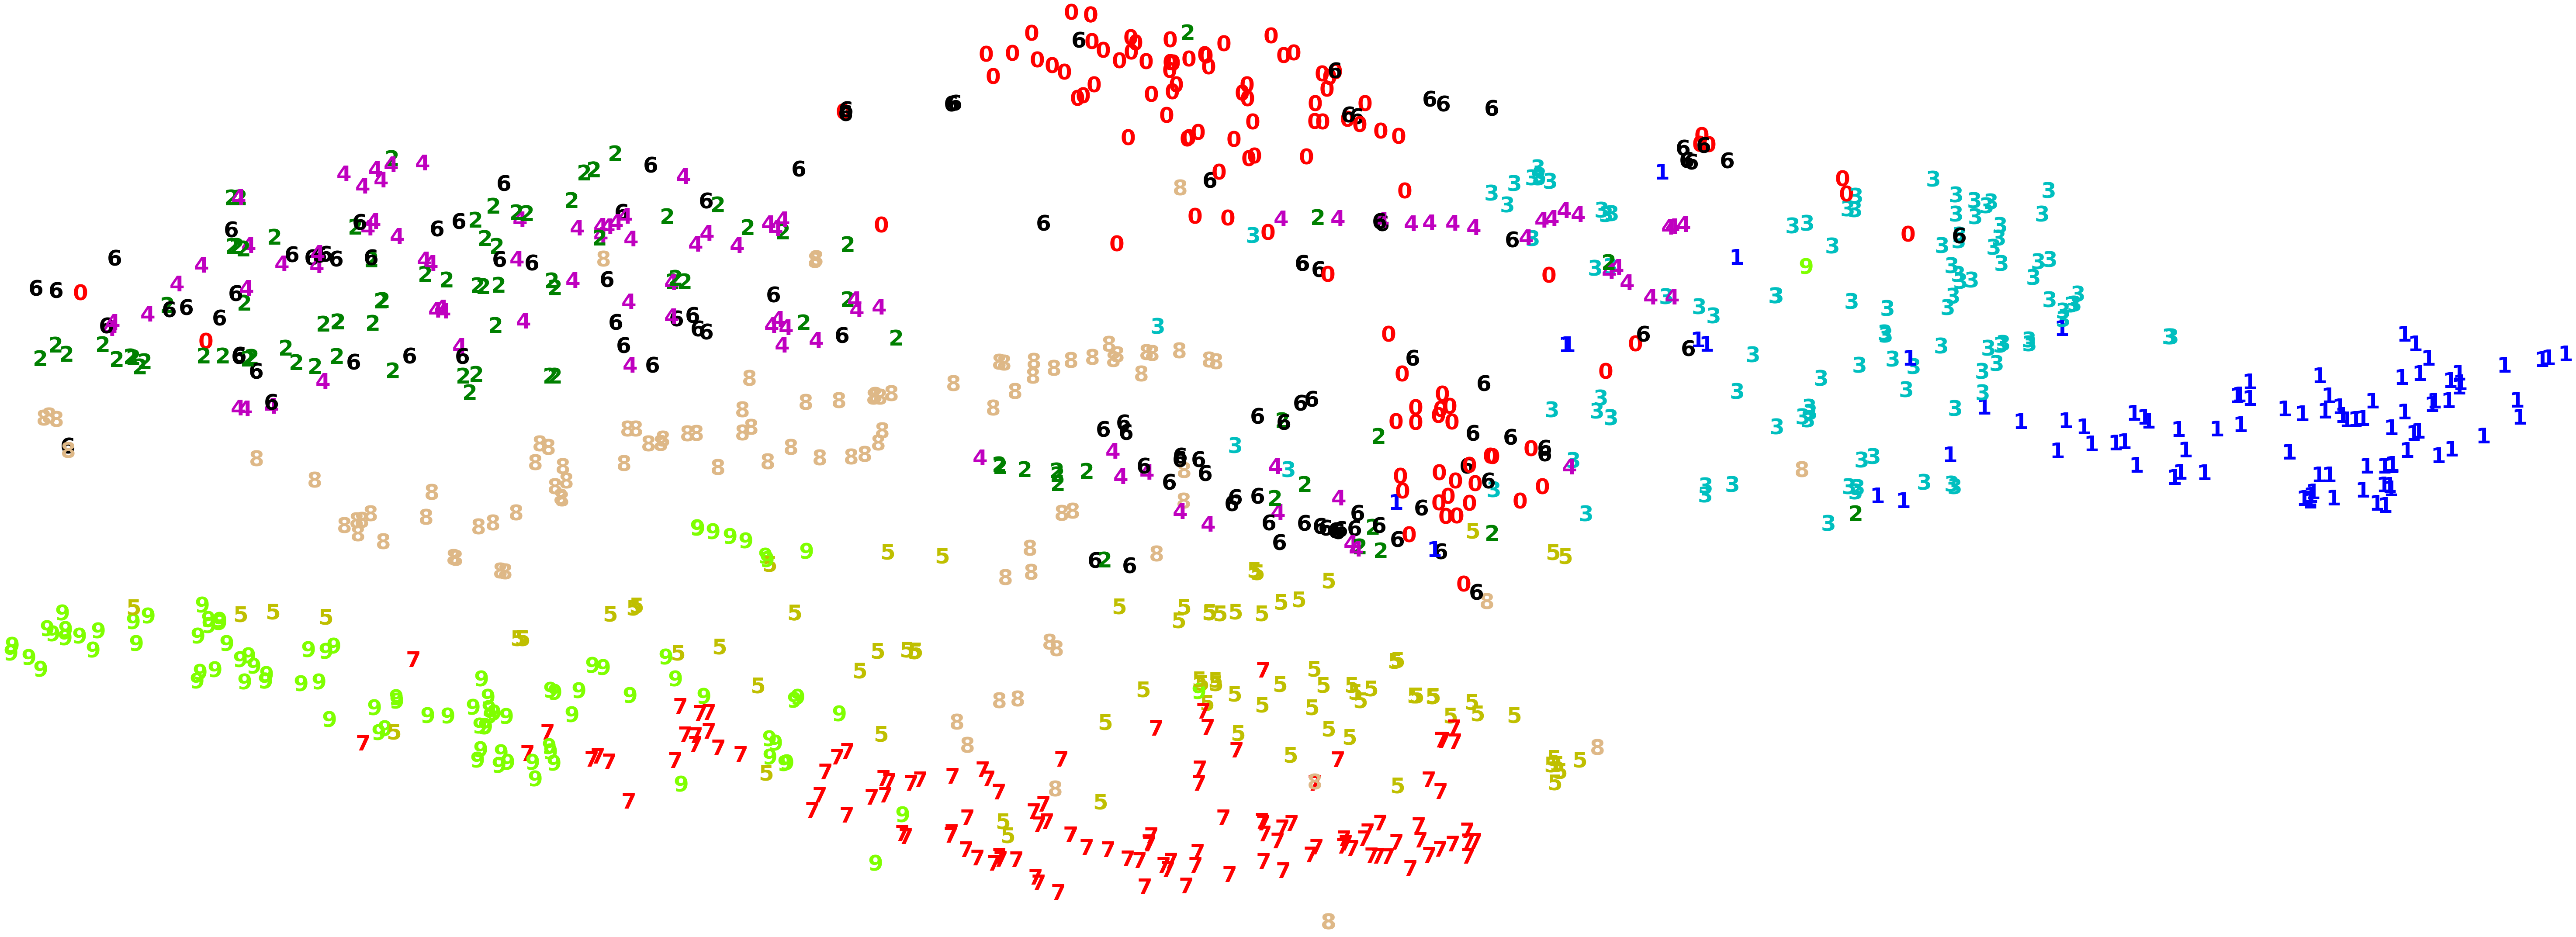

In [5]:
plt.figure(figsize=(3,1))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(X_tsne.shape[0]):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

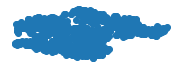

In [6]:
plt.figure(figsize=(3,1))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# #4
Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?

Works quite well, definitely spreads the data out more to differentiate it better.

# #5
Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

In [7]:
def do_tsne(perplexity):
    X_tsne = TSNE(n_components=2,  perplexity=perplexity, n_iter=300).fit_transform(X_std)
    return X_tsne

In [8]:
def do_graphs(X_tsne):
    plt.figure(figsize=(3,1))
    colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
    for i in range(X_tsne.shape[0]):
        plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
                 color=colours[int(y[i])],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
    plt.figure(figsize=(3,1))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [9]:
def main(perplexity):
    print('t-SNE Perplexity: {}'.format(perplexity))
    X_tsne = do_tsne(perplexity)
    print('Fit Done')
    do_graphs(X_tsne)

t-SNE Perplexity: 5
Fit Done


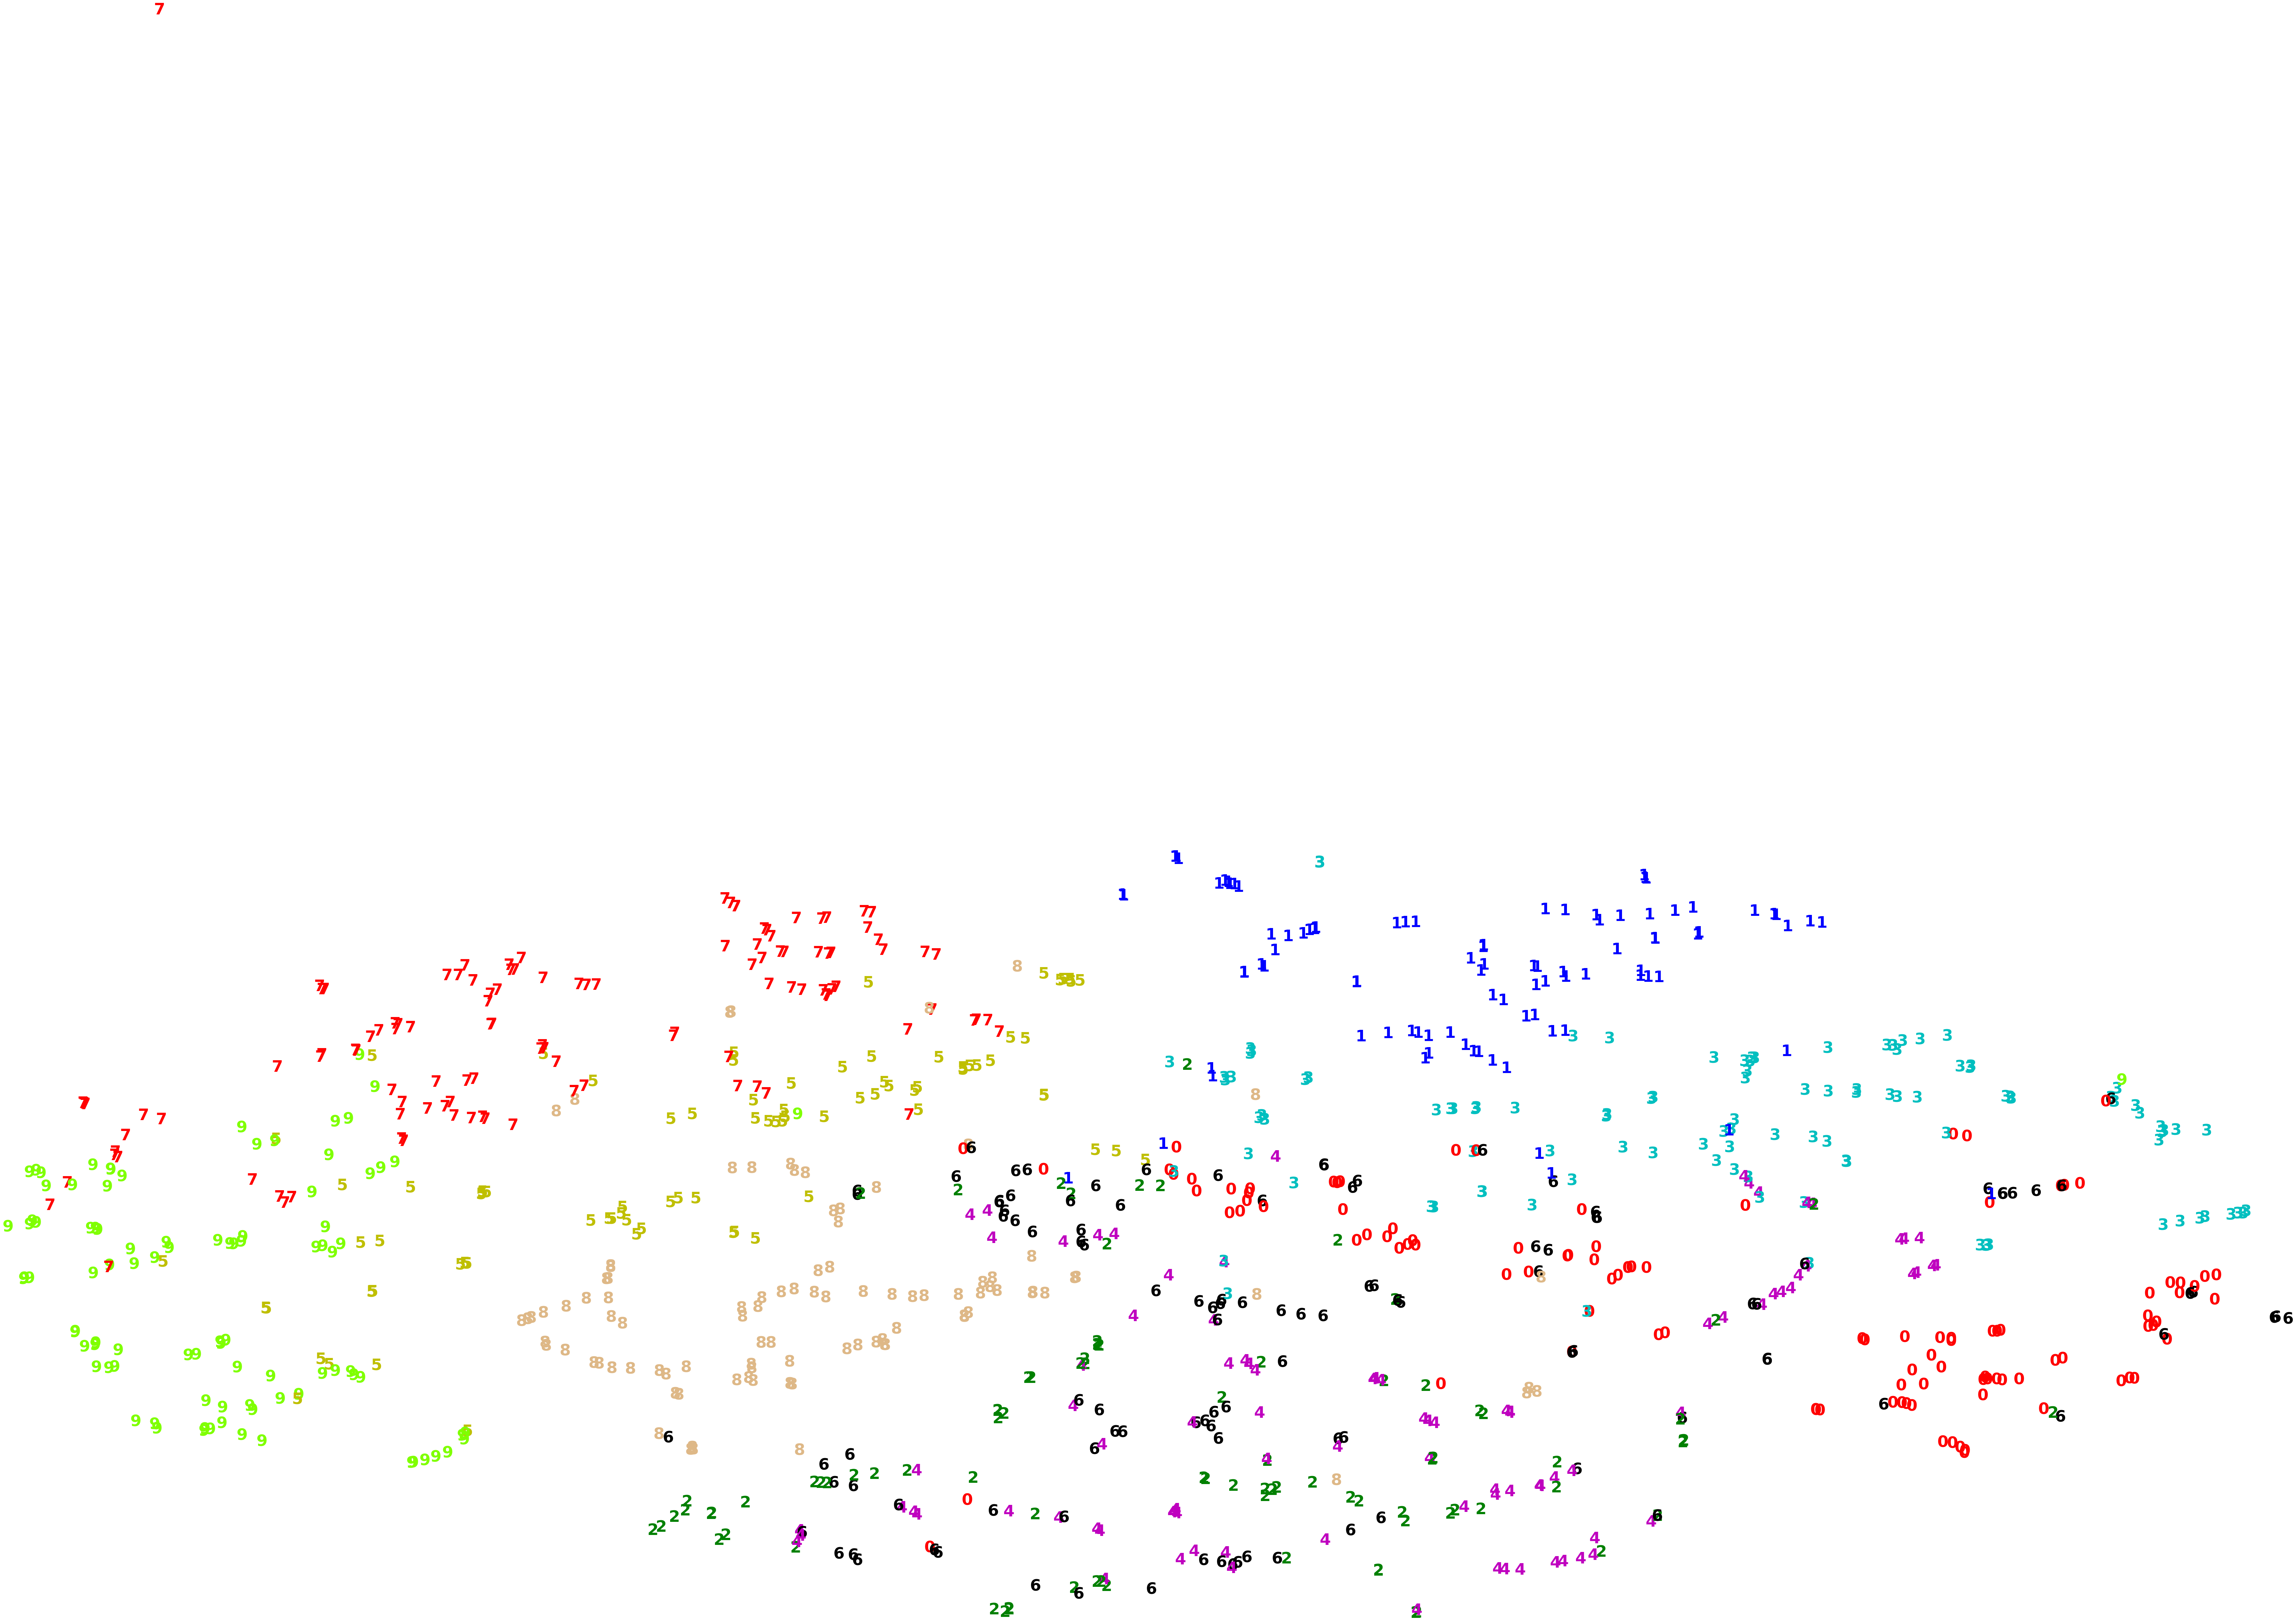

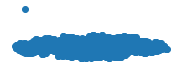

t-SNE Perplexity: 10
Fit Done


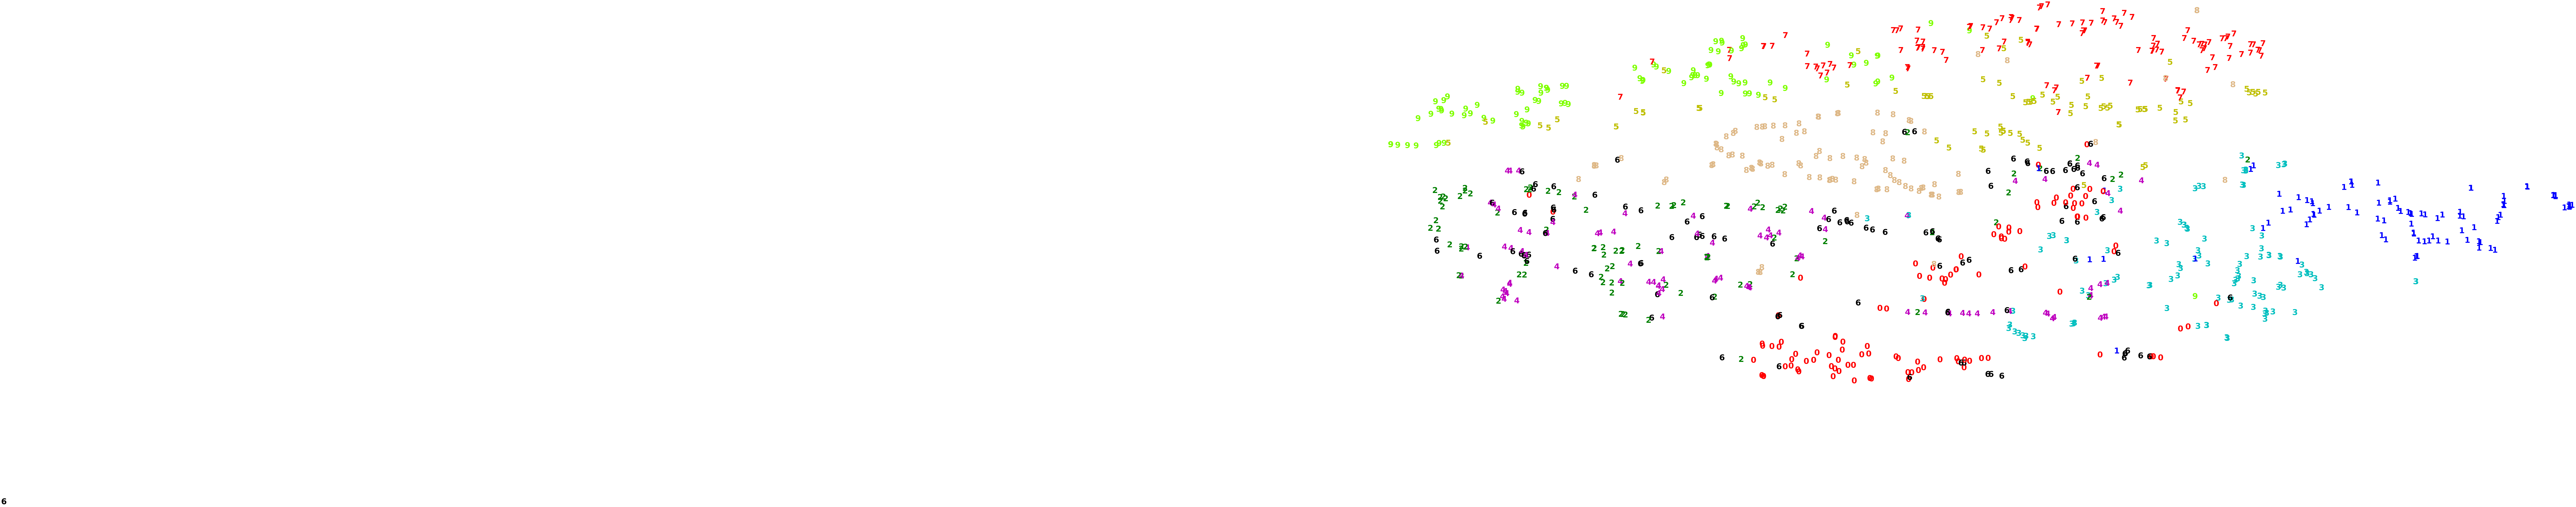

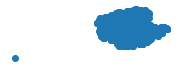

t-SNE Perplexity: 15
Fit Done


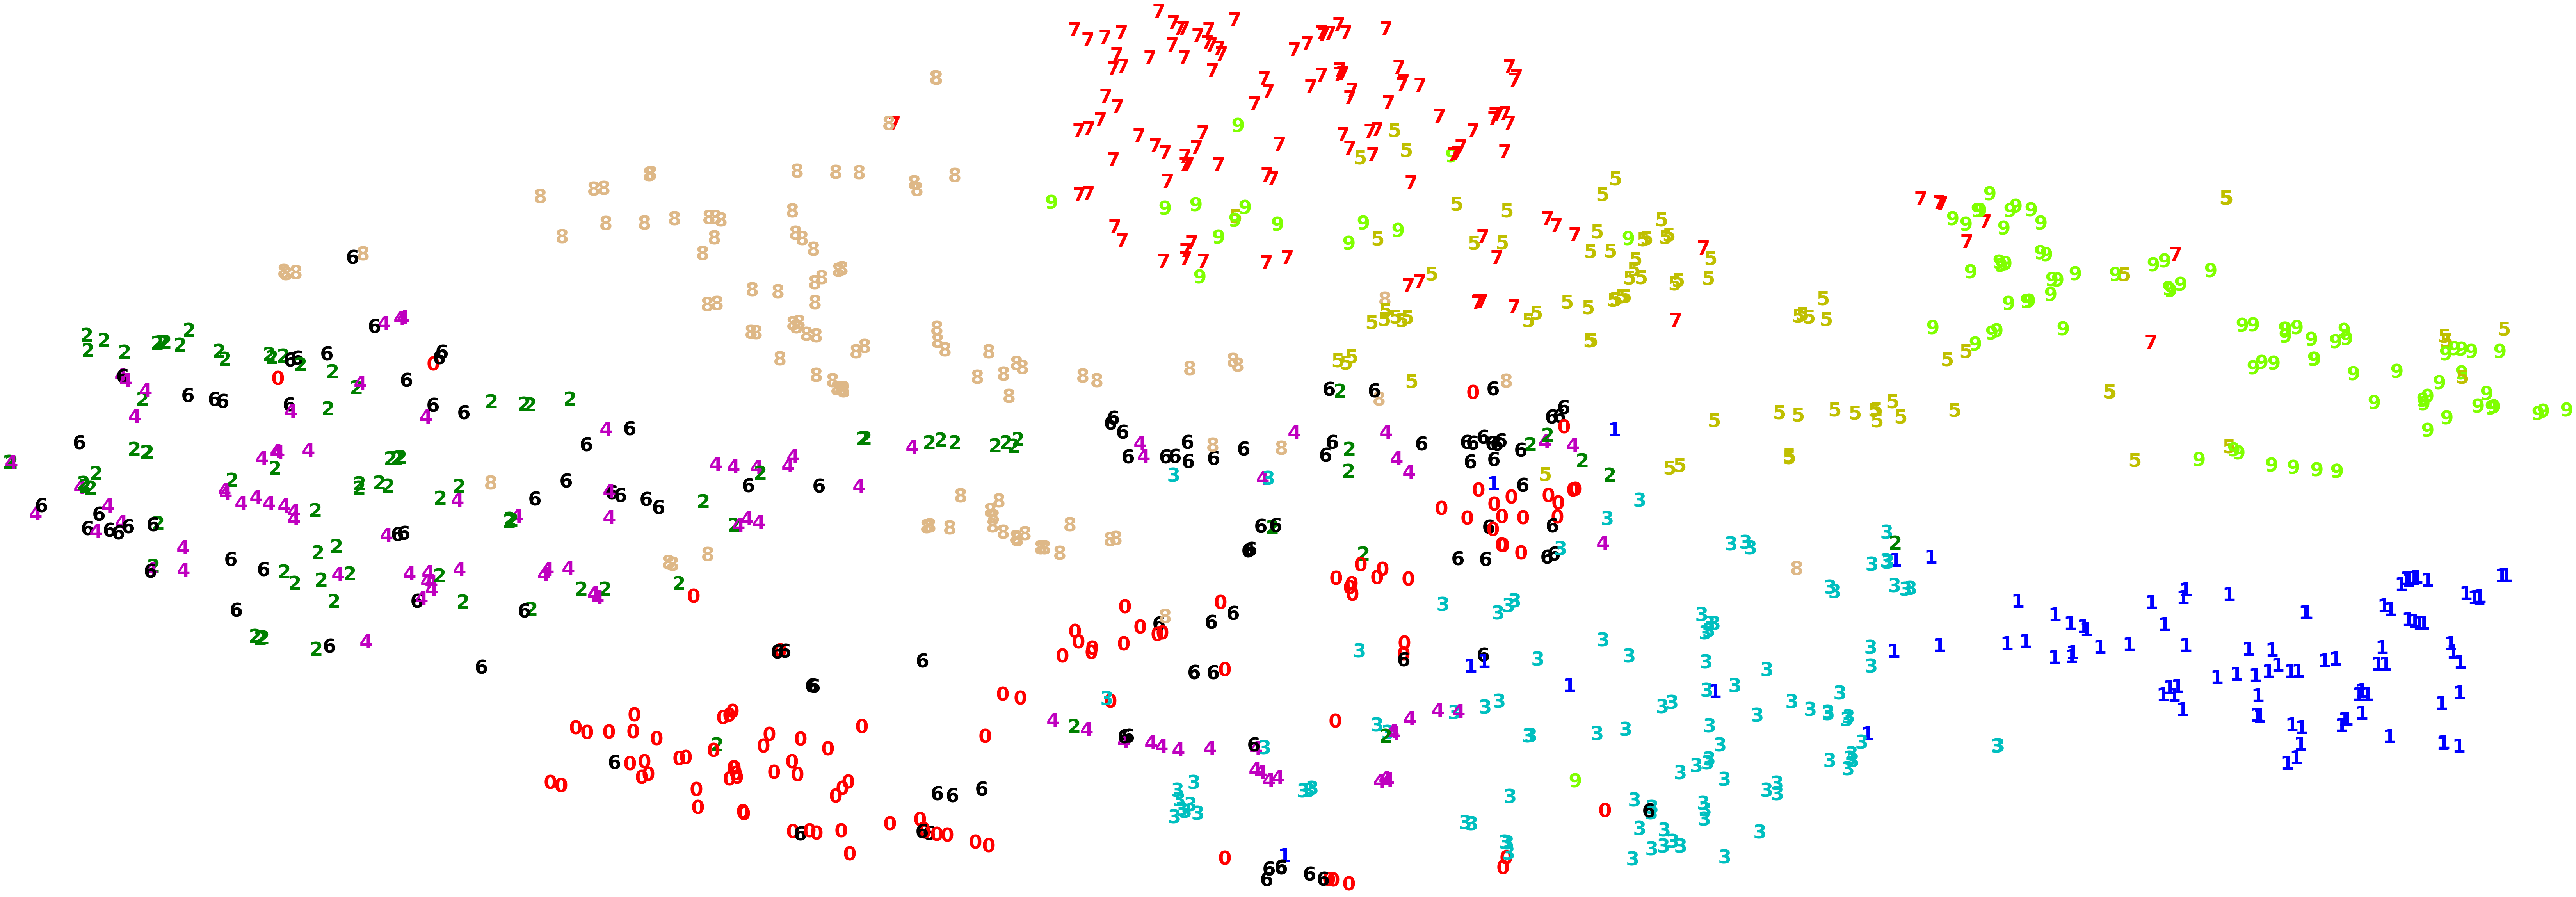

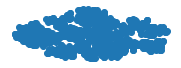

t-SNE Perplexity: 20
Fit Done


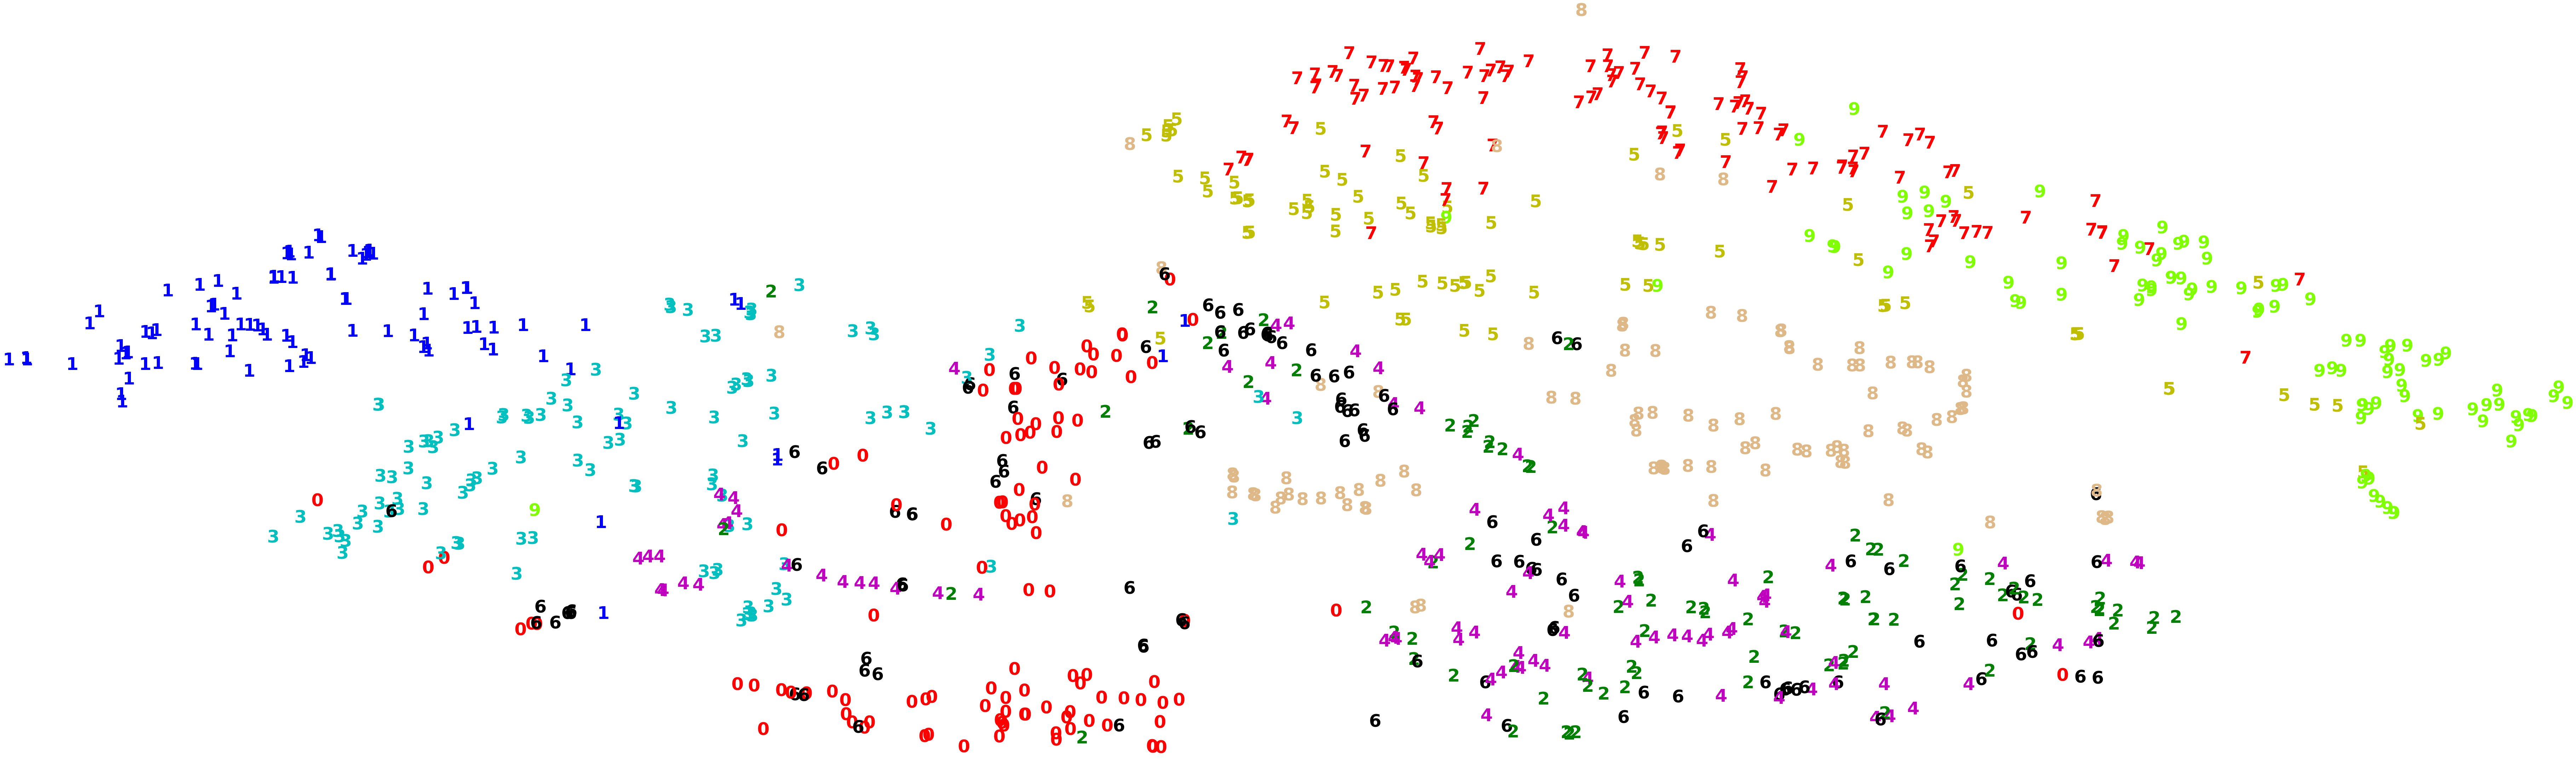

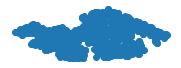

t-SNE Perplexity: 25
Fit Done


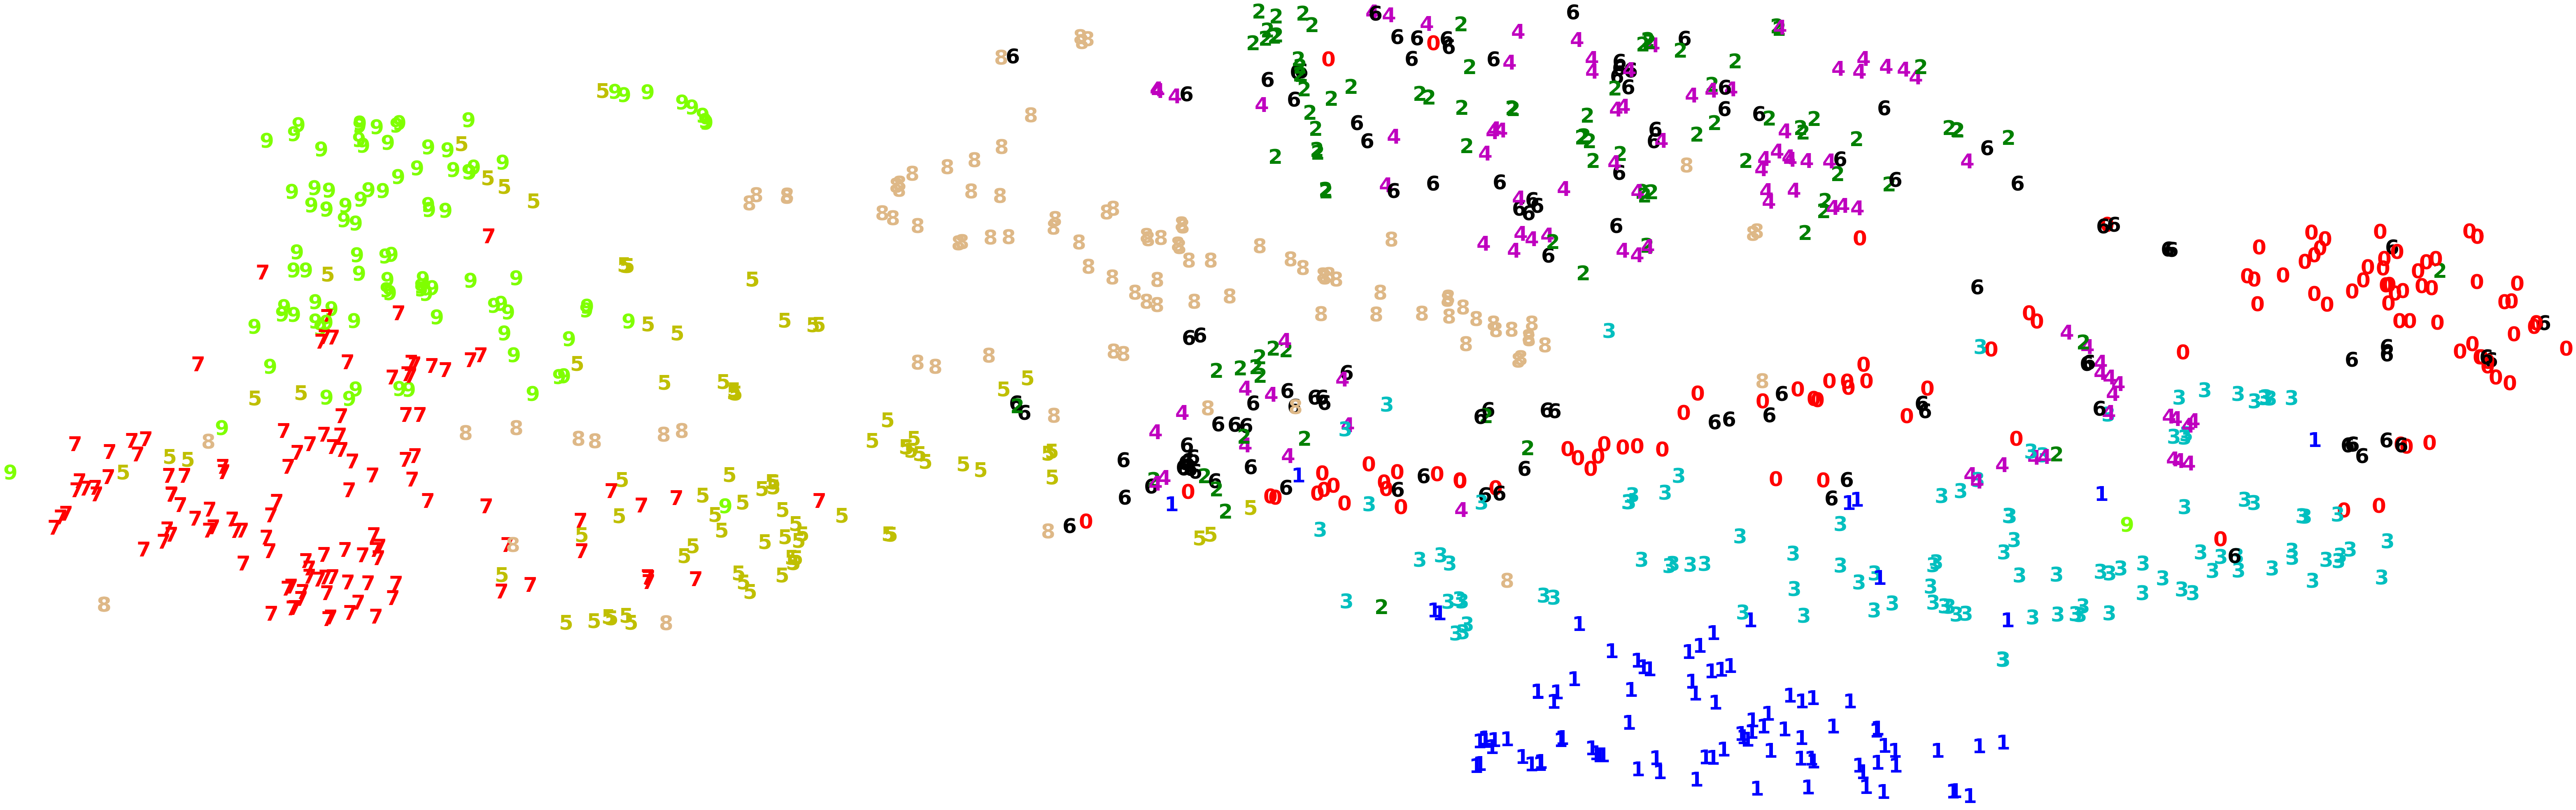

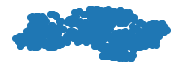

t-SNE Perplexity: 30
Fit Done


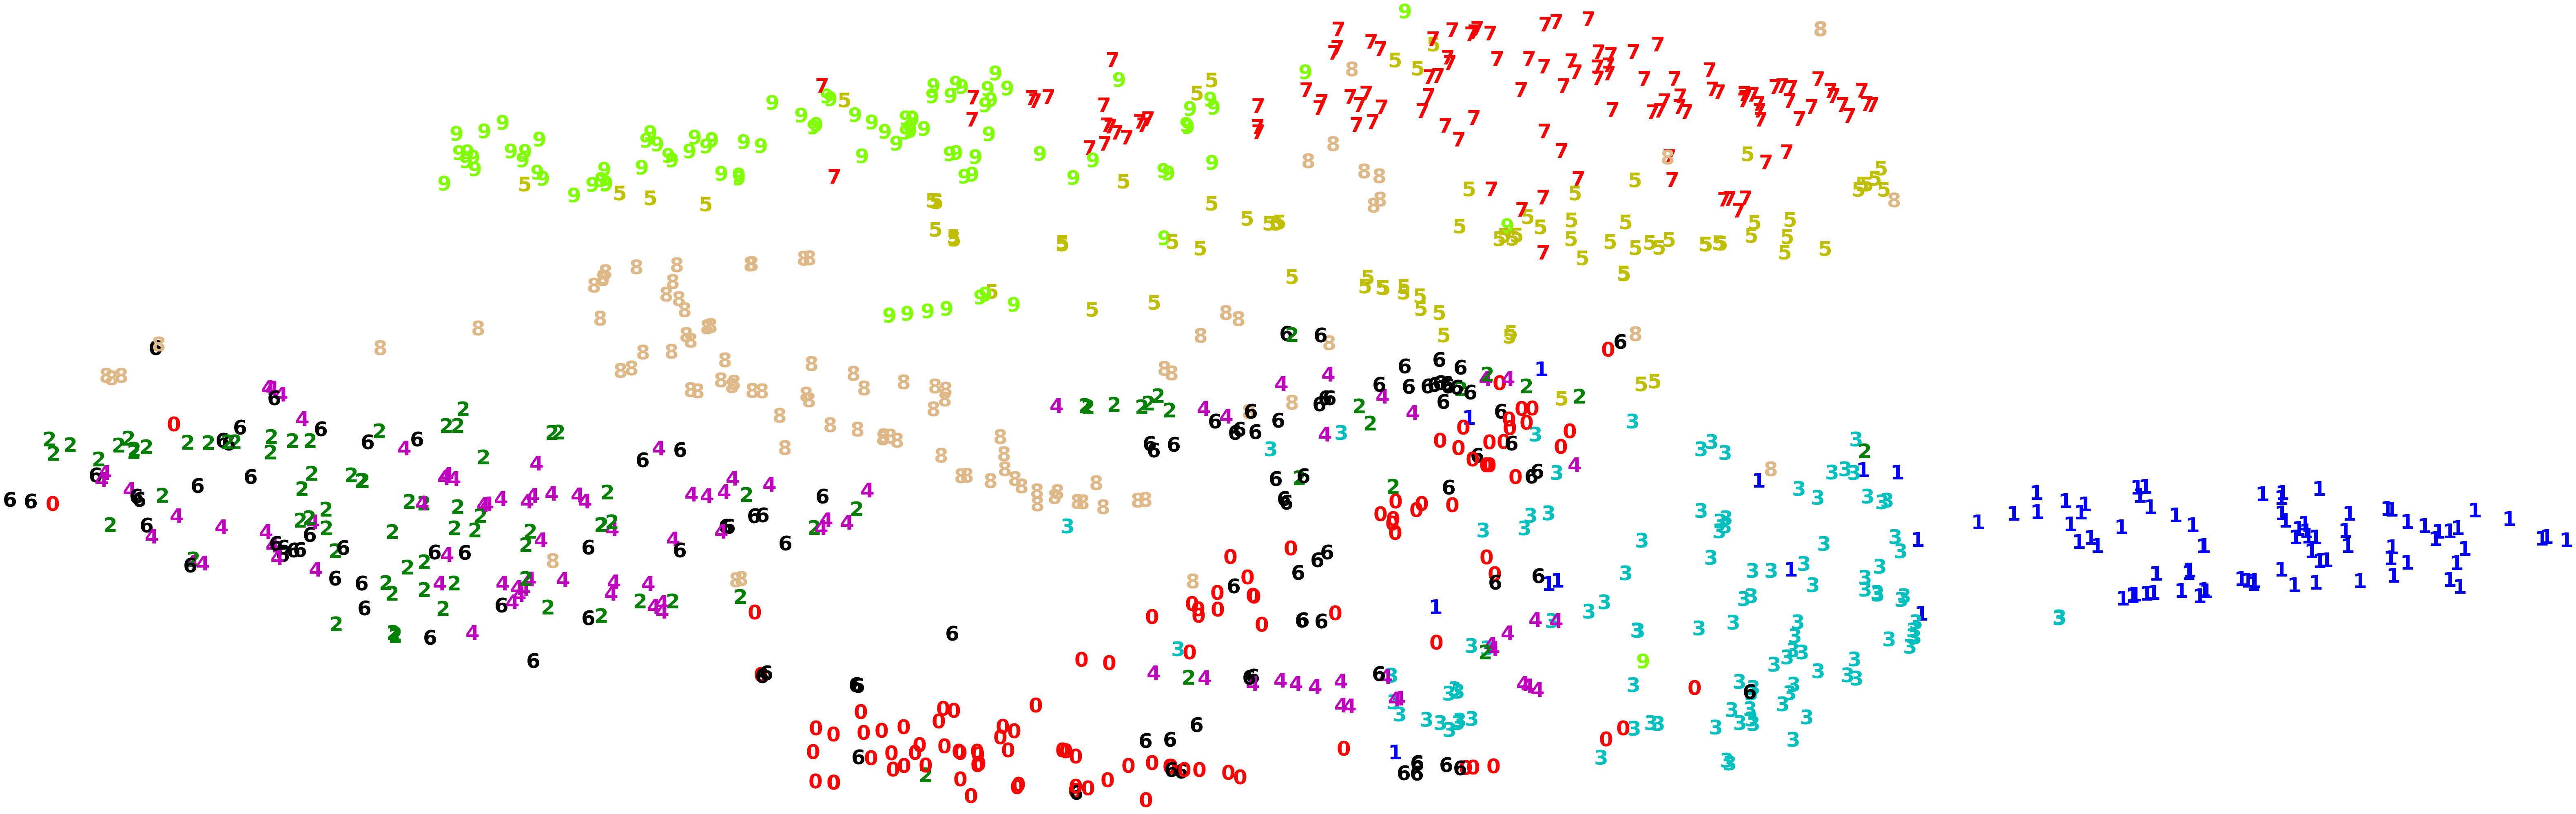

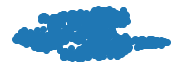

t-SNE Perplexity: 35
Fit Done


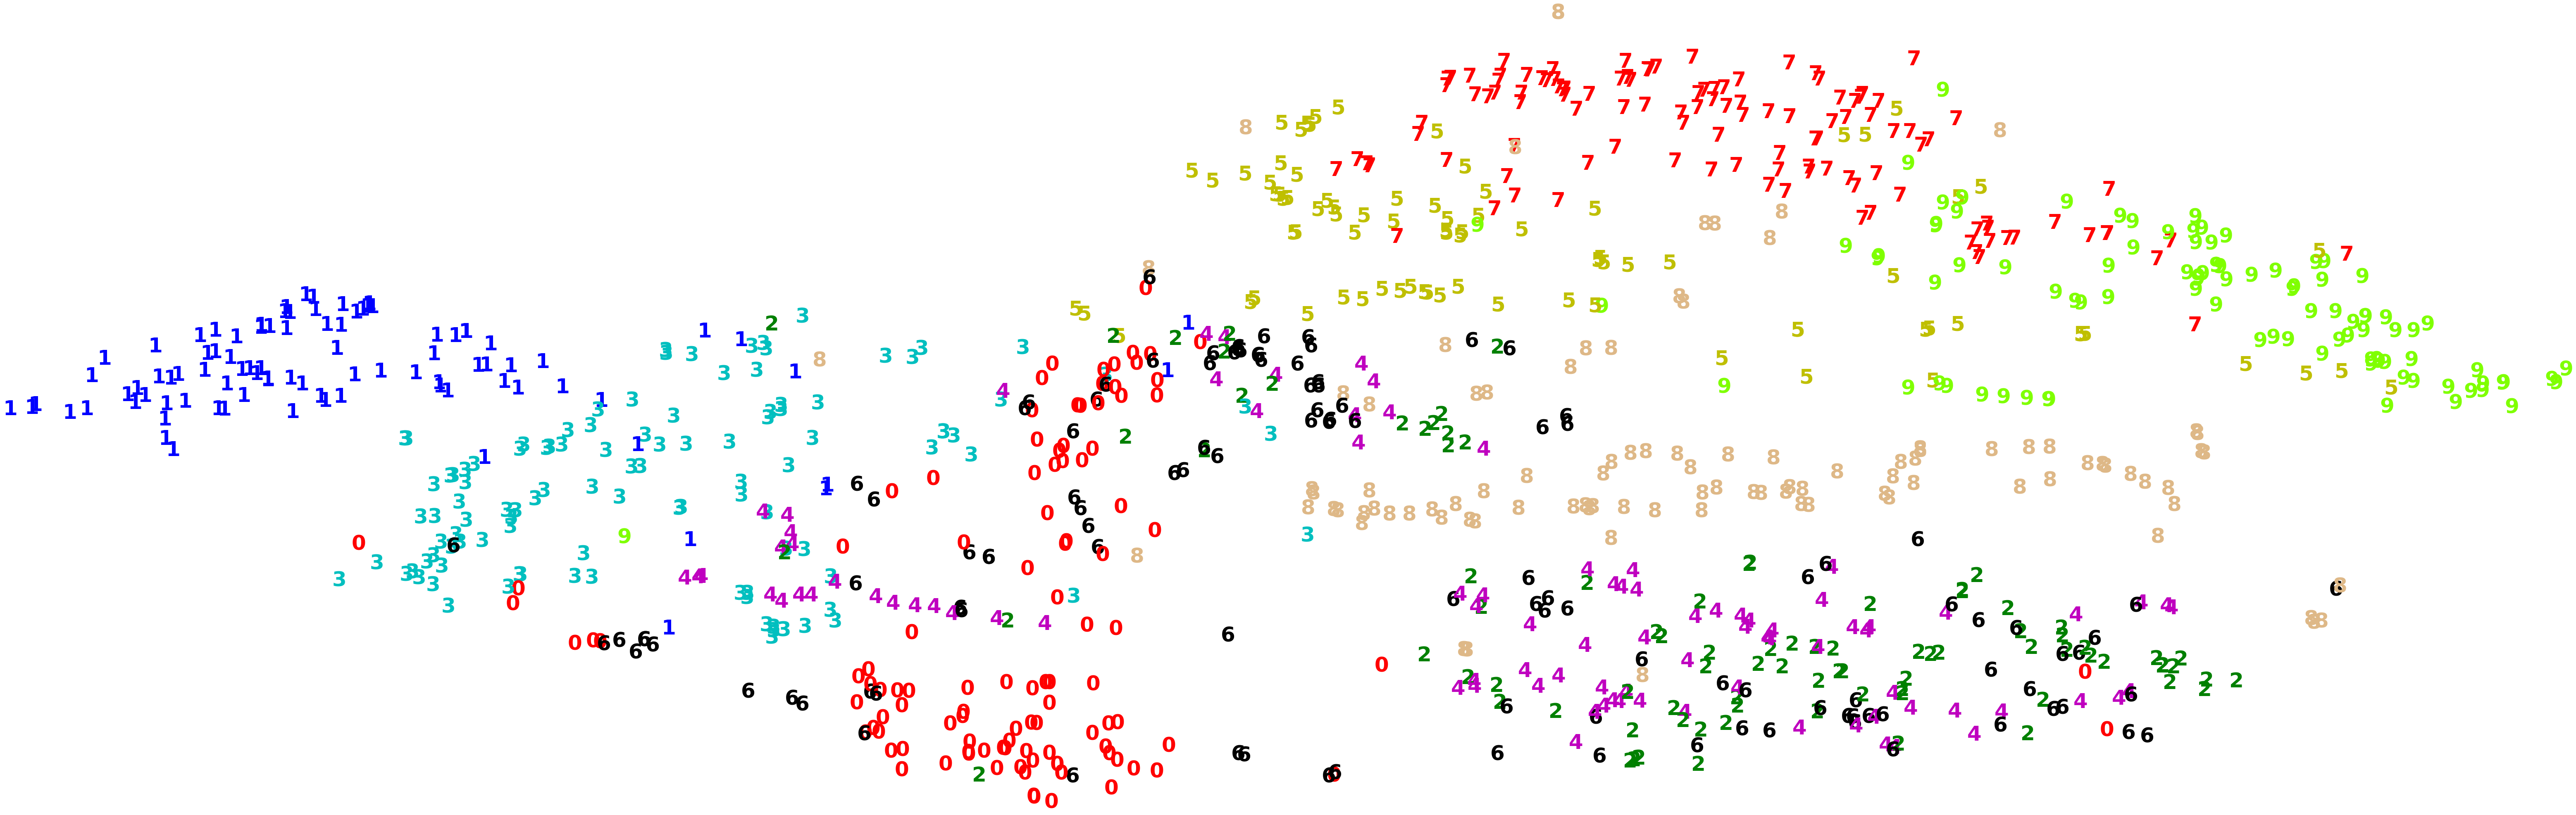

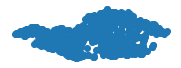

t-SNE Perplexity: 40
Fit Done


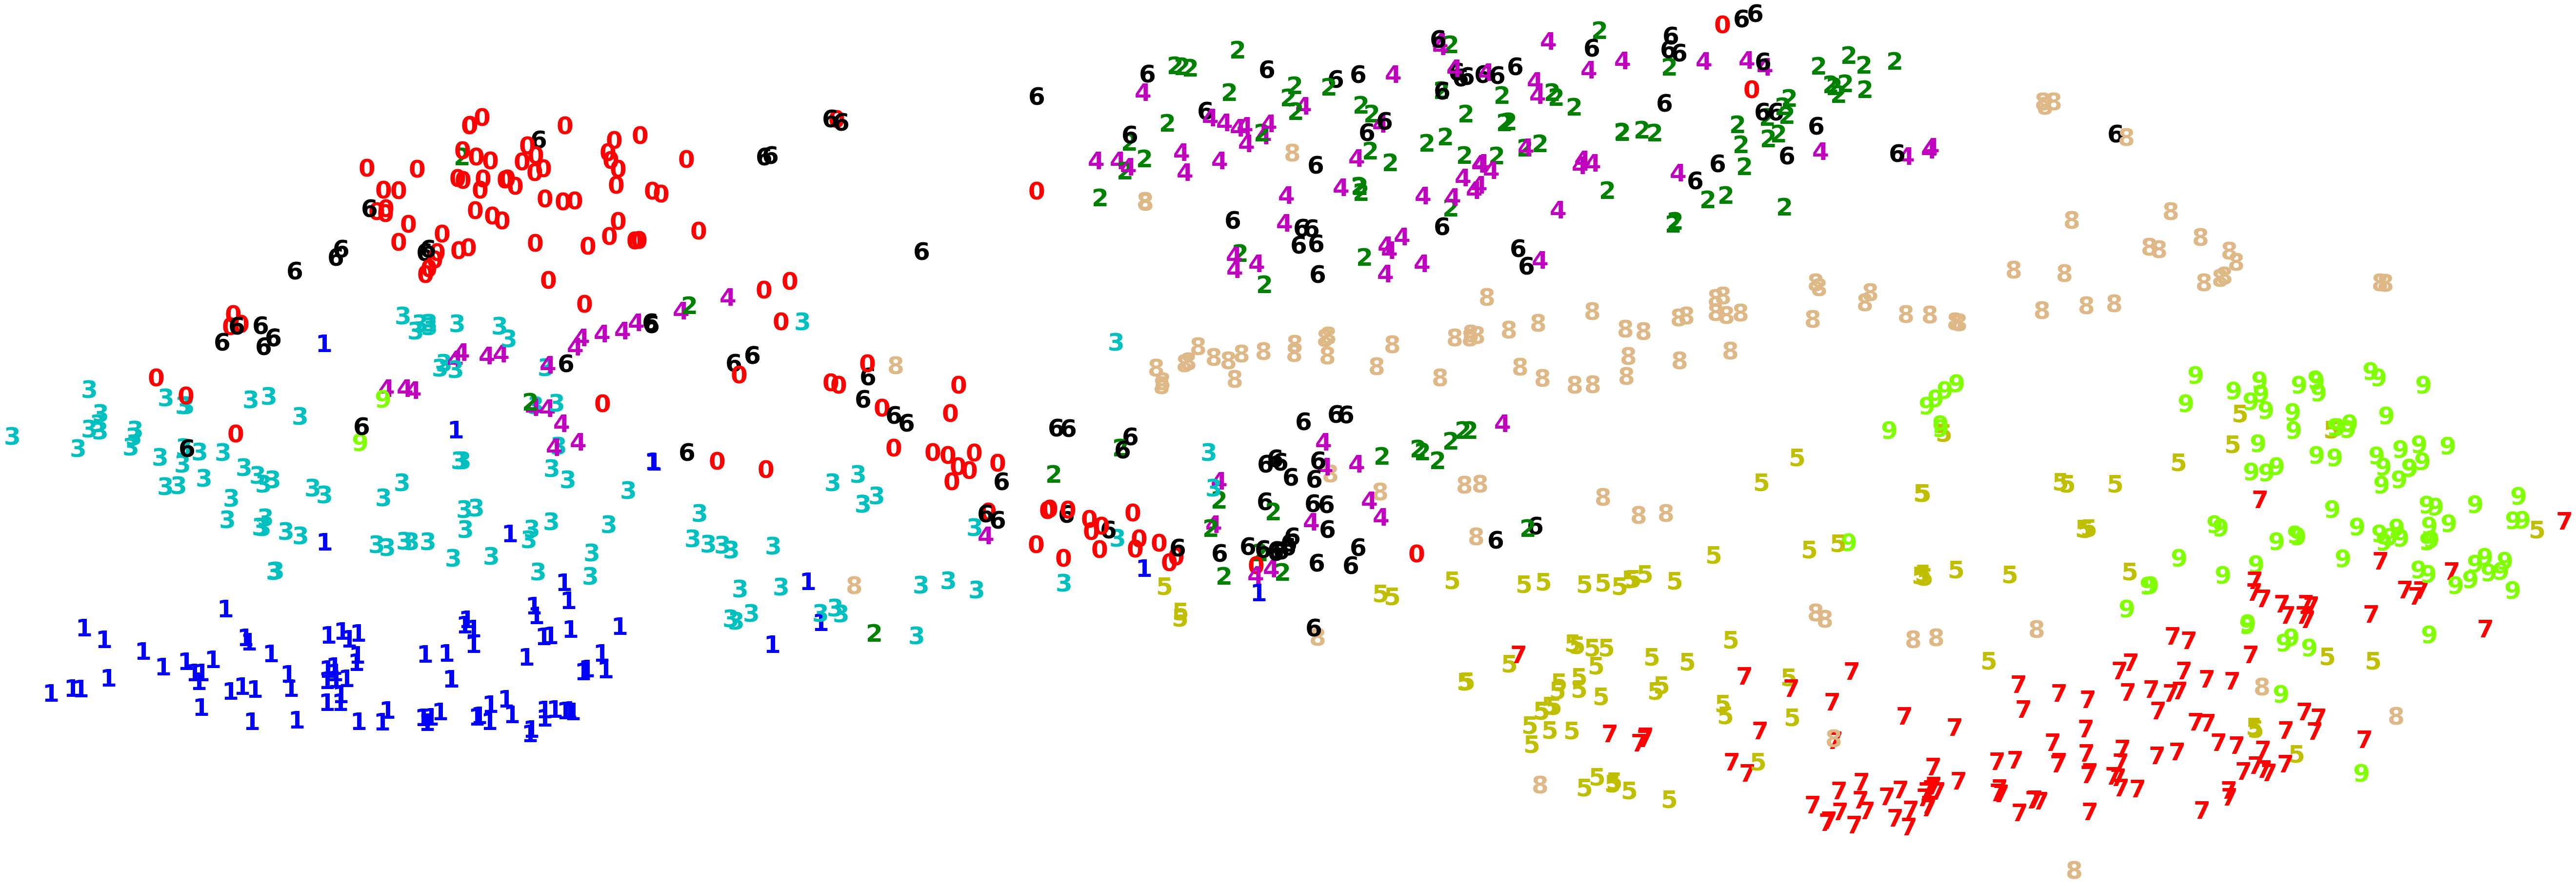

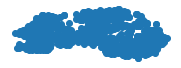

t-SNE Perplexity: 45
Fit Done


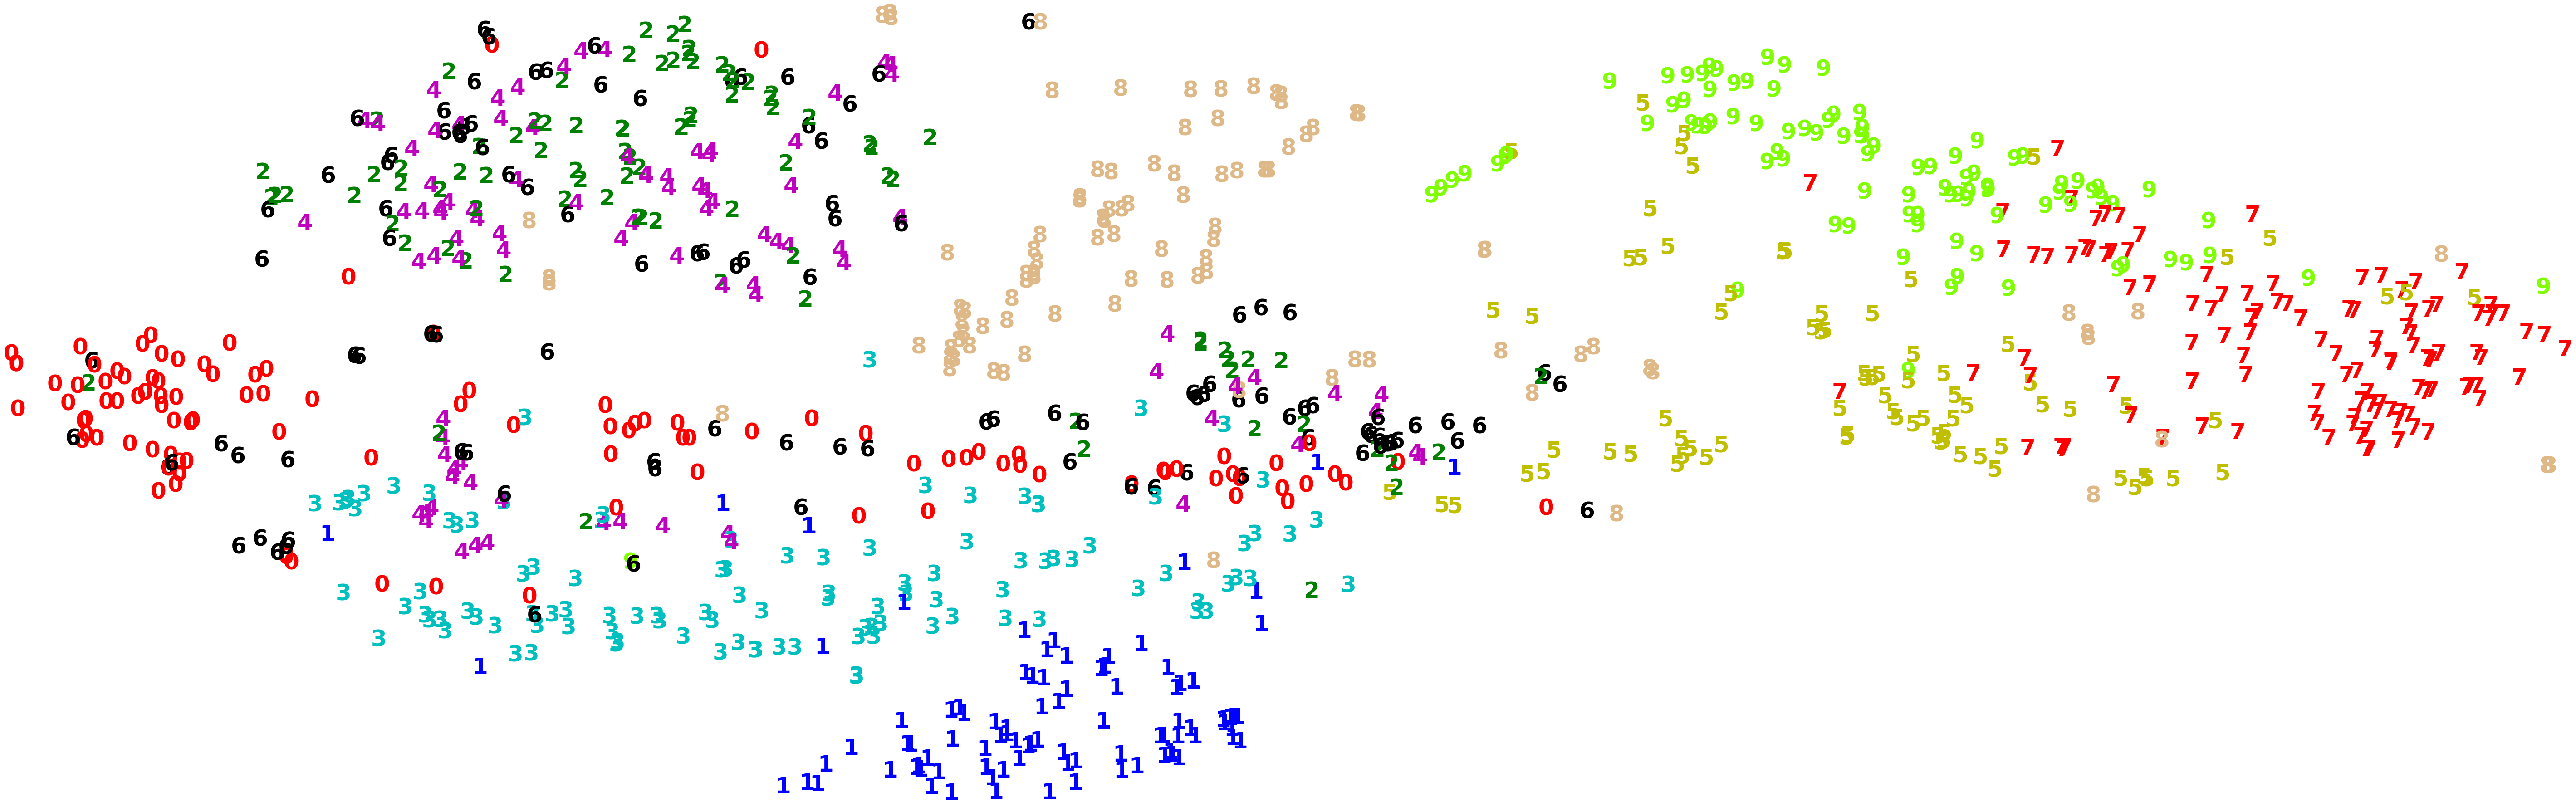

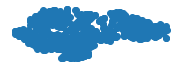

t-SNE Perplexity: 50
Fit Done


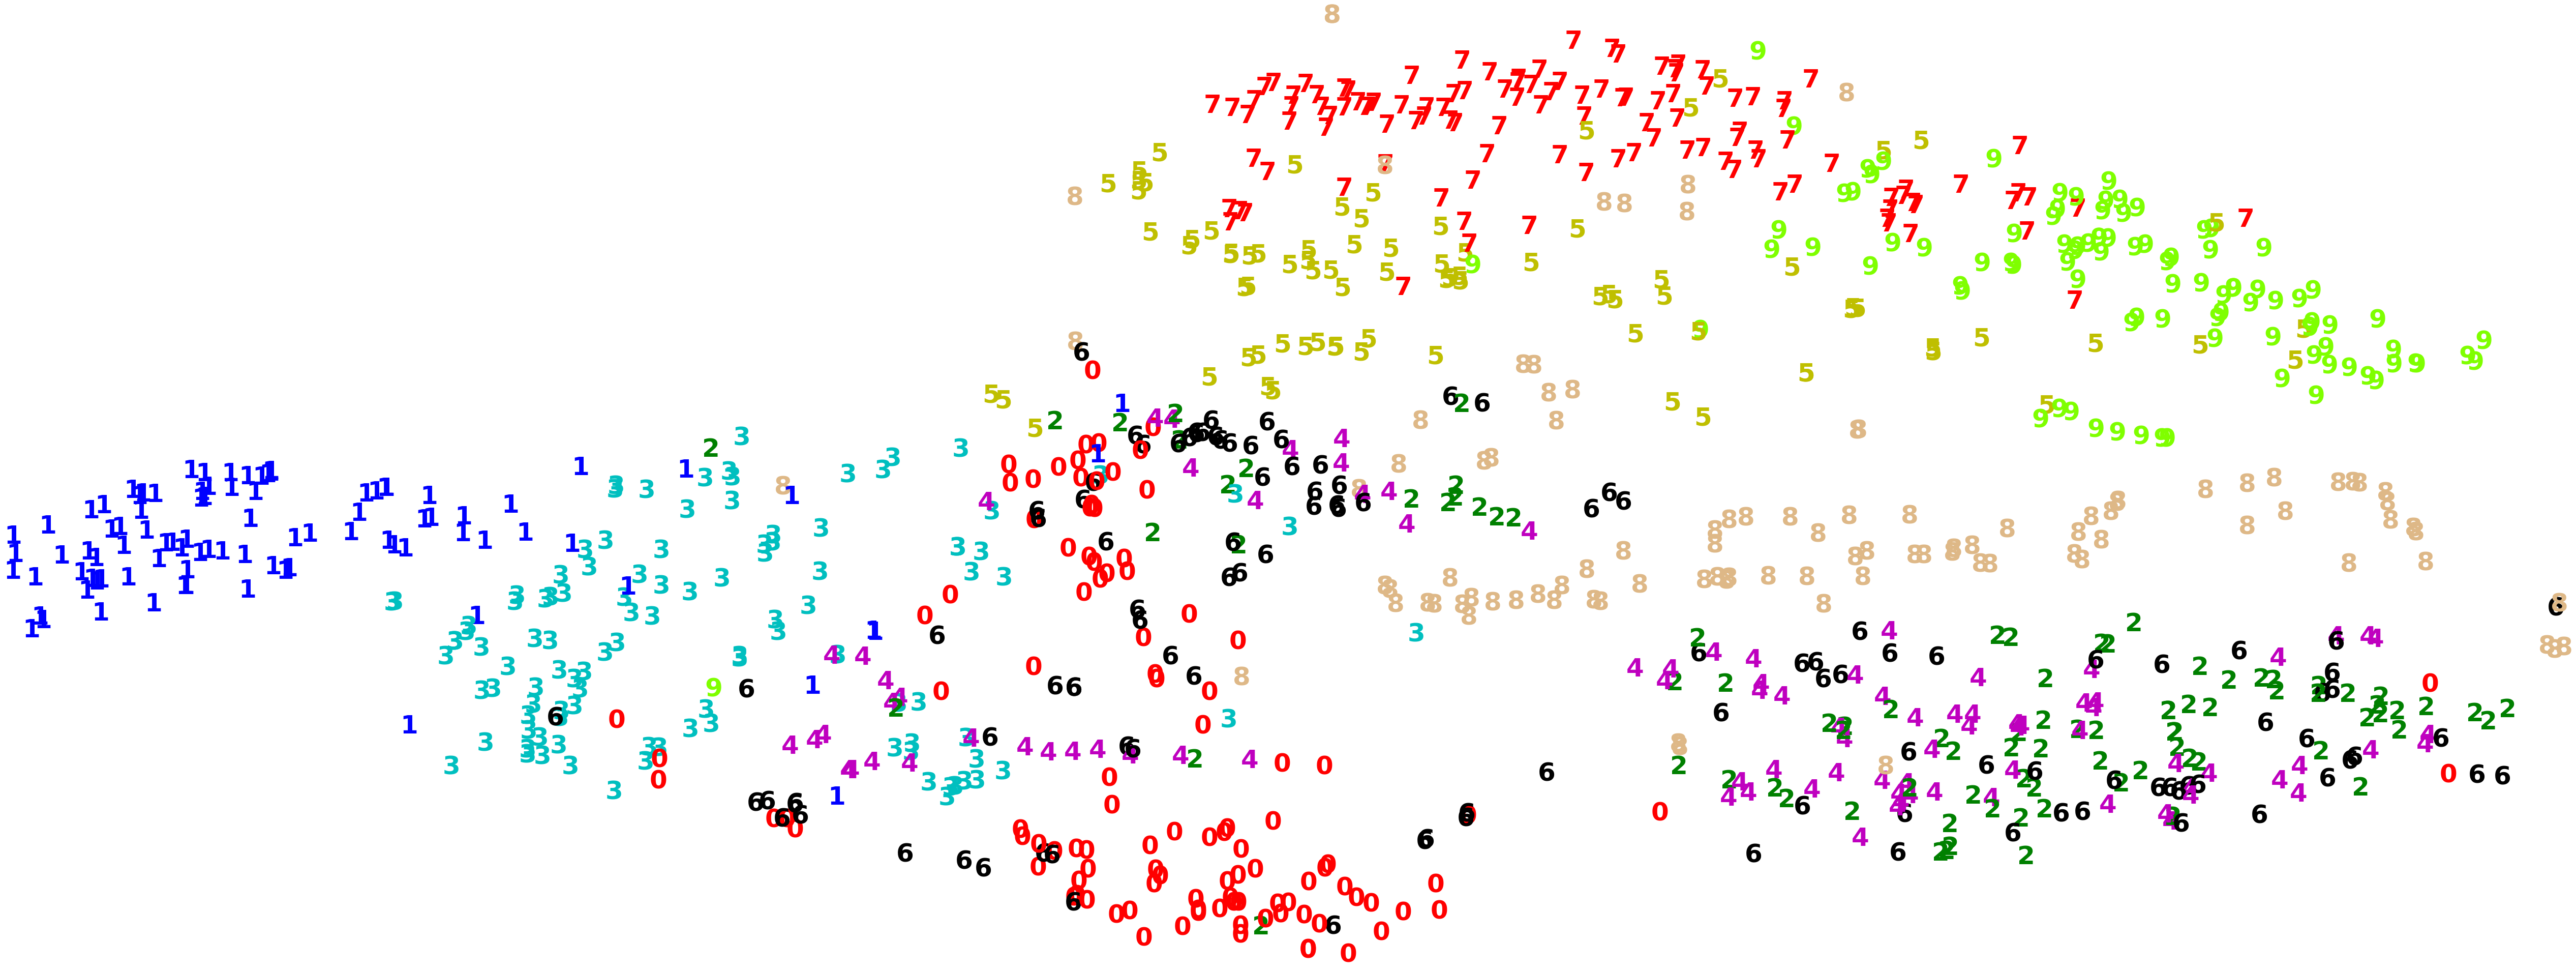

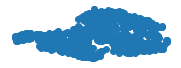

In [10]:
for i in range(5, 51, 5):
    main(i)

The perplexity definitely changes the outgoing shape, but the differences are still decently spread out. Some definitely more than others, but I wouldn't say its completely amazing. But everything is in its general vicinity.